In [86]:
import json
from functools import partial 
from copy import deepcopy


In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
%matplotlib inline

In [88]:
with open('scenario.json') as f:
    scenario = json.load(f)
scenario['pedestrians'] = np.asarray(scenario['pedestrians'])
scenario['obstacles'] = np.asarray(scenario['obstacles'])
scenario['target'] = np.asarray(scenario['target'])
scenario

{'field': {'height': 10, 'width': 5},
 'pedestrians': array([[0, 4],
        [0, 2]]),
 'obstacles': array([[3, 2]]),
 'target': array([[5, 3]])}

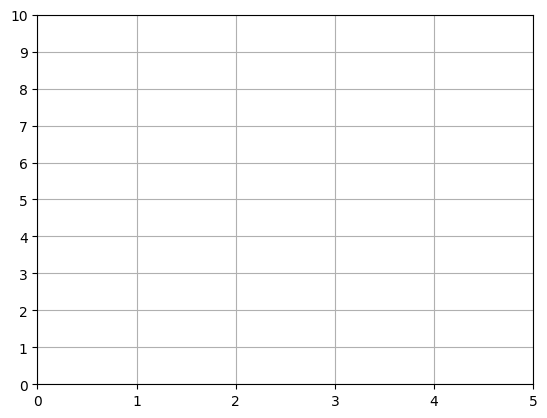

In [89]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, scenario['field']['width']+1, 1))
ax.set_yticks(np.arange(0, scenario['field']['height']+1, 1))
plt.grid()

ax.set_xlim((0, scenario['field']['width']))
ax.set_ylim((0, scenario['field']['height']))

# line, = ax.plot([], [], lw=2)
colors = ['b', 'r', 'g']
cmap = matplotlib.colors.ListedColormap(colors)
sc_plot = ax.scatter([], [], c=[], cmap=cmap)

In [90]:
state = deepcopy(scenario)
offsets = np.concatenate((state['pedestrians'], state['obstacles'], state['target']))
colors = np.concatenate((
    np.zeros(state['pedestrians'].shape[0]), 
    np.zeros(state['obstacles'].shape[0])+1, 
    np.zeros(state['target'].shape[0])+2,
))

def init():
    sc_plot.set_offsets([[0, 0]])
    return (sc_plot,)

def animate(i, sc_plot):
    sc_plot.set_offsets(offsets+i/100)
    sc_plot.set_array(colors)
    return (sc_plot,)

anim = animation.FuncAnimation(fig, partial(animate, sc_plot=sc_plot), init_func=init,
                               frames=100, interval=30, blit=True)
anim

In [91]:
HTML(anim.to_html5_video())